In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_excel("PLA_Data2.xlsx",sheet_name="Sheet1")
dataframe = pd.DataFrame(data)
df = dataframe.sample(frac=0.75)
data_size = len(df)
print(df)

           x1        x2  Class
19   0.007660  1.449177     -1
160  0.167243 -1.249023     -1
53   1.767107 -0.174477     -1
117  2.364527  1.897497      1
5    1.431290  2.637786      1
..        ...       ...    ...
75   1.394213 -0.655994     -1
7    0.319134 -0.248444     -1
55   3.153393 -1.494763     -1
4    0.452785 -1.547923     -1
11   2.615033  1.248210      1

[149 rows x 3 columns]


In [2]:
#Making a copy of the excel file
#taking randomly 75% data into the dataframe for testing

In [3]:
X1 = df["x1"].to_numpy(float)
X2 = df["x2"].to_numpy(float)
Y = df["Class"].to_numpy(float)
Y = Y.reshape((data_size,1))

In [4]:
#copying the array items into respective numpy arrays and reshaping the dimensions

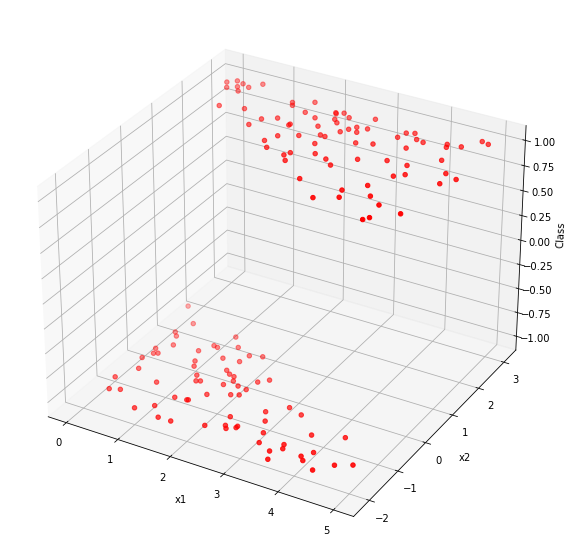

In [5]:
fig = plt.figure()
fig.set_size_inches(20,10,forward=True)
ax = fig.add_subplot(projection='3d')
ax.scatter3D(X1,X2,Y,color="Red")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Class')
plt.show()

In [6]:
#plotting the graph for X1, X2, Class.

In [7]:
Ones = np.ones(data_size)
X = np.dstack((Ones,X1,X2))[0]
W = np.random.rand(3,1)
count = 0
while count < data_size:
    count=0
    for i in range(data_size):
        Xtrain = X[i].reshape(3,1)
        if np.sign(Y[i]) != np.sign(np.matmul(np.transpose(W), Xtrain)):
            W += Y[i] * Xtrain
        else:
            count +=1


In [8]:
#Training the algo with 75% dataset to get the required Weight list.
#Testing the remaining 25% of the dataset.
#counting no. of errors in testing dataset

In [9]:
testing_data = dataframe.copy(deep=True)
testing_data = testing_data.drop(df.index)
testing_data['H(X1,X2)'] = np.sign(W[0][0] + W[1][0]*testing_data['x1'] + W[2][0]*testing_data['x2'])
print(testing_data)
Error_count=0
for i in testing_data.index:
    if testing_data.loc[i][2] != testing_data.loc[i][3]:
        Error_count += 1
print("No. of Errors in testing : ",Error_count)

           x1        x2  Class  H(X1,X2)
0    1.957778  2.409601      1       1.0
3    1.255596  0.686478     -1      -1.0
8    0.087256  2.957088      1       1.0
12   4.354132 -1.565729     -1      -1.0
17   0.762137 -1.065214     -1      -1.0
26   3.248707 -1.367555     -1      -1.0
34   3.329140  0.597597      1       1.0
37   1.096523 -1.668563     -1      -1.0
43   1.983531 -0.114030     -1      -1.0
44   3.556618  1.157975      1       1.0
52   0.956648 -2.193069     -1      -1.0
62   0.955072  1.774342      1       1.0
63   4.703325  2.586743      1       1.0
71   0.871814 -1.480354     -1      -1.0
79   1.983678 -1.306706     -1      -1.0
80   4.069748  0.311716      1       1.0
84   0.002551  1.375199     -1      -1.0
88   4.607998  1.026400      1       1.0
92   0.273273 -0.952987     -1      -1.0
95   3.649490  2.600115      1       1.0
98   4.230650  0.140950      1       1.0
100  4.856477  0.283759      1       1.0
104  4.530857  2.200857      1       1.0
106  2.934843 -0